<a href="https://colab.research.google.com/github/mahmudpial/image-classification/blob/main/ethnicity_prediction_with_human_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

 117270700_813928275810499_7318649958055524212_n.jpg
 117305042_294622121772035_5649736097761877314_n.jpg
 117323366_219880596067699_1991214900546940172_n.jpg
 117341840_298925347883326_5505942929475828243_n.jpg
 117387305_363960824597294_9106519184349043148_n.jpg
 117444742_623743241890451_3915465362243370523_n.jpg
 117467038_596667244552189_5851340374659573617_n.jpg
 117609074_1240775186266935_8289370954157850903_n.jpg
 117655879_1048592495556902_6423298246126451519_n.jpg
 117708460_604630846913928_575197778975663646_n.jpg
 117745650_292074455379428_5909730932662848869_n.jpg
 117758595_752444598650681_8515641691017422837_n.jpg
 117808552_329628414833517_8022282498242461786_n.jpg
 183-15-11856-e.pdf
 183-15-11856-e.zip
 183-15-11856-O5-LabfinalDBMS.pdf
 20200822_124927.pdf
 2021-04-15-10-49-31.flv
 ACT-301-183-15-11856-MID.pdf
'Answer to the question no 2,183-15-11856 (1).pdf'
 Assignment_.pdf
 Classroom
'Class Test 1 CG.gdoc'
 CODE_3-1.asm
 CODE_3-2.asm
'Colab Notebooks'
 CSE231-O2-1

In [3]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

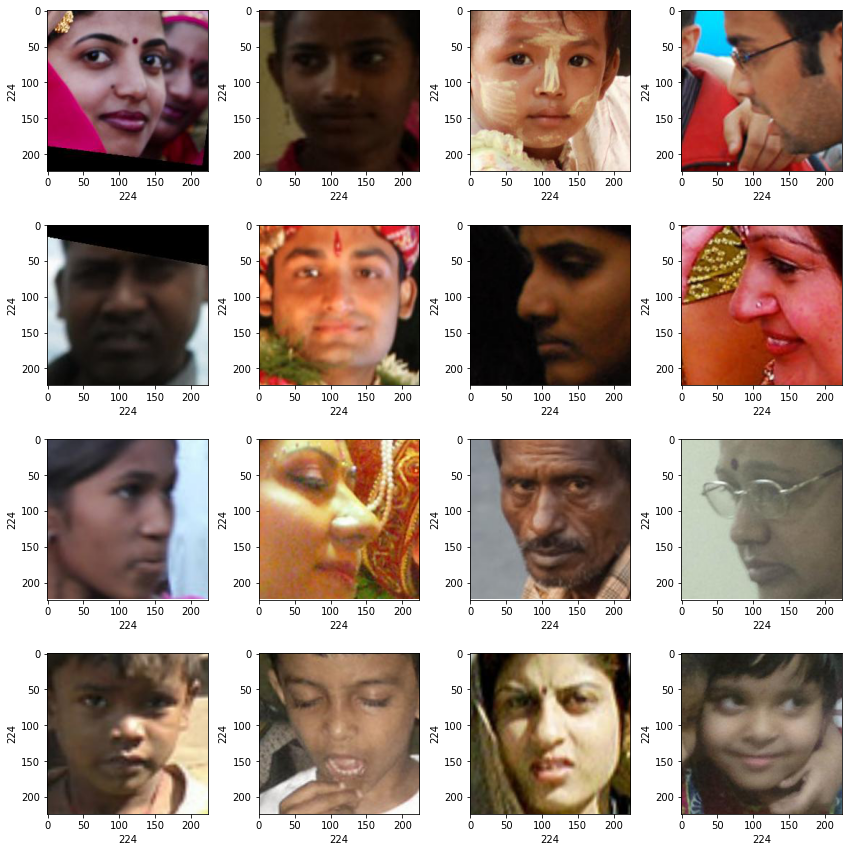

In [4]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Colab Notebooks/Mini Dataset/Indian"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [5]:
# Setting path and creating empty list
dir = "/content/drive/MyDrive/Colab Notebooks/Mini Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [6]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [7]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

East Asian         1000
Indian             1000
Southeast Asian    1000
dtype: int64

In [8]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

3

In [9]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [10]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(3000,)

In [11]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [12]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

In [13]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['East Asian' 'Indian' 'Southeast Asian']


In [14]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [15]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [16]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [32]:
# Training the model
epochs = 50
batch_size = 150
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
13/13 [==============================] - 5s 245ms/step - loss: 0.1650 - accuracy: 0.9646 - val_loss: 1.5488 - val_accuracy: 0.5771
Epoch 2/50
13/13 [==============================] - 2s 141ms/step - loss: 0.1530 - accuracy: 0.9661 - val_loss: 1.5845 - val_accuracy: 0.5625
Epoch 3/50
13/13 [==============================] - 2s 142ms/step - loss: 0.1423 - accuracy: 0.9724 - val_loss: 1.6248 - val_accuracy: 0.5583
Epoch 4/50
13/13 [==============================] - 2s 144ms/step - loss: 0.1316 - accuracy: 0.9766 - val_loss: 1.6843 - val_accuracy: 0.5708
Epoch 5/50
13/13 [==============================] - 2s 142ms/step - loss: 0.1304 - accuracy: 0.9760 - val_loss: 1.7073 - val_accuracy: 0.5625
Epoch 6/50
13/13 [==============================] - 2s 143ms/step - loss: 0.1167 - accuracy: 0.9823 - val_loss: 1.7406 - val_accuracy: 0.5771
Epoch 7/50
13/13 [==============================] - 2s 143ms/step - loss: 0.1209 - accuracy: 0.9729 - val_loss: 1.7879 - val_accuracy: 0.5604
Epoch 

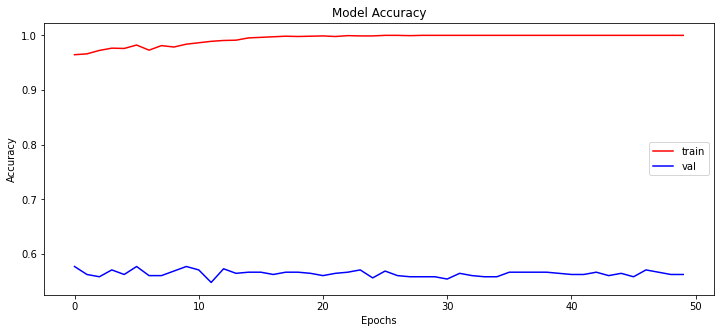

In [33]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

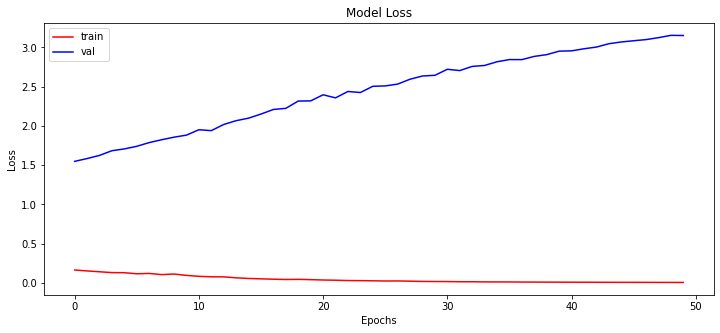

In [34]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [35]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

19/19 [==============================] - 0s 22ms/step - loss: 3.2996 - accuracy: 0.5917
Test Accuracy: 59.16666388511658


In [36]:
# Storing predictions
y_pred = model.predict(x_test)

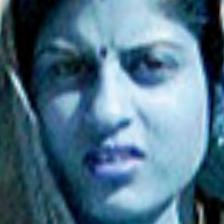

In [37]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

In [38]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['East Asian' 'Indian' 'Southeast Asian']
Originally :  Indian
Predicted :  Indian
